In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/dollar.csv', delimiter=',')
#print(data.columns)

data['annual growth ratio'] = data['annual growth ratio'].str.rstrip('%')
data['year'] = data['year'].str.replace('*', '')

# Convert to num
data = data.apply(pd.to_numeric, errors='coerce')

# Remove rows with missing values
data.dropna(inplace=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-2-6d7e39671326>:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['year'] = data['year'].str.replace('*', '')


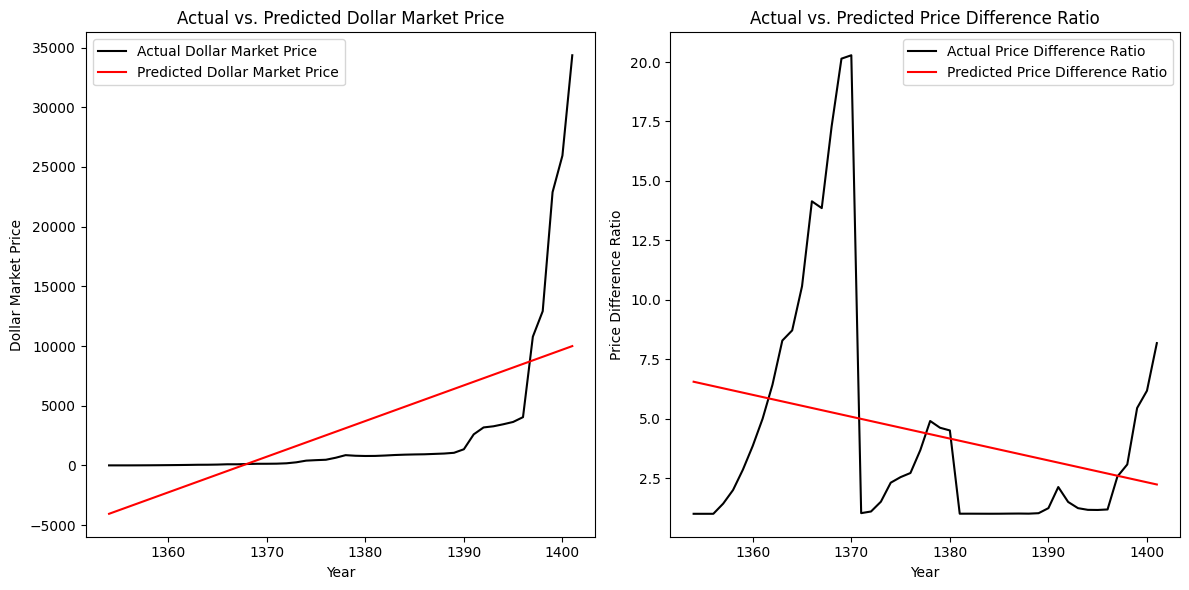

In [4]:
import matplotlib.pyplot as plt

year = data['year']
dollar_market_price = data['dollar market price']
dollar_official_price = data['dollar official price']

price_difference_ratio = dollar_market_price / dollar_official_price

#linear regression using the closed-form
X_dollar_market_price = np.column_stack([np.ones(len(year)), year])
coefficients_dollar_market_price = np.linalg.inv(X_dollar_market_price.T @ X_dollar_market_price) @ X_dollar_market_price.T @ dollar_market_price

#linear regression using the closed-form
X_price_difference_ratio = np.column_stack([np.ones(len(year)), year])
coefficients_price_difference_ratio = np.linalg.inv(X_price_difference_ratio.T @ X_price_difference_ratio) @ X_price_difference_ratio.T @ price_difference_ratio

predicted_dollar_market_price = coefficients_dollar_market_price[0] + coefficients_dollar_market_price[1] * year
predicted_price_difference_ratio = coefficients_price_difference_ratio[0] + coefficients_price_difference_ratio[1] * year

#plots
plt.figure(figsize=(12, 6))
#Dollar market price
plt.subplot(1, 2, 1)
plt.plot(year, dollar_market_price, label="Actual Dollar Market Price", color="black")
plt.plot(year, predicted_dollar_market_price, label="Predicted Dollar Market Price", color="red")
plt.xlabel("Year")
plt.ylabel("Dollar Market Price")
plt.title("Actual vs. Predicted Dollar Market Price")
plt.legend()

#Price difference ratio
plt.subplot(1, 2, 2)
plt.plot(year, price_difference_ratio, label="Actual Price Difference Ratio", color="black")
plt.plot(year, predicted_price_difference_ratio, label="Predicted Price Difference Ratio", color="red")
plt.xlabel("Year")
plt.ylabel("Price Difference Ratio")
plt.title("Actual vs. Predicted Price Difference Ratio")
plt.legend()

plt.tight_layout()
plt.show()

# New section

# New section